<div class="alert alert-warning">
    
Lectura recomendada: [Best Practices for Scientific Computing](http://arxiv.org/pdf/1210.0530v3.pdf)
</div>

# Ejercicios de Caos

In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from ipywidgets import interact, fixed, widgets, IntSlider, FloatSlider, interact_manual

### Mapeo logístico

$$
x_{n+1} = rx_n(1 -x_n)
$$

Donde, para fines de esta clase, $r$ esta contenido en 

$$
0 \leq r \leq 4
$$

la razón de esto, es que el cuadro unitario mapea al cuadro unitario, i.e.

$$ 
0 \leq x \leq 1 \to 0 \leq f(x) \leq 1
$$

<div class="alert alert-info">
    
**Ejercicio** ¿Por qué?
</div>

<div class="alert alert-info">
    
**Ejercicio**  Define la función `logistic_map` que recibe como parámetros $x$ y $r$ regresa $rx(1−x)$. 
</div>

In [4]:
def logistic_map(x,r):
    return r*x*(1-x)

Los _puntos fijos_ del mapeo logístico son:

$$
x = f(x)
$$

$$
x = rx(1-x)
$$

$$
1 = r(1-x)
$$

$$
x = 1 - \frac{1}{r}
$$

El punto fijo se dice _estable_ si $|f(x) - x_0| < |x - x_0|$ e _inestable_ si la desigualdad se invierte.

<div class="alert alert-info">
    
**Ejercicio** Calcule el punto fijo para $r = 2$ usando SymPy
</div>

In [5]:
x = sym.Symbol('x')

In [6]:
def calcular_punto_fijo(r):
    return 1 - 1/r

In [7]:
x = calcular_punto_fijo(sym.Symbol('r'))

In [8]:
x

1 - 1/r

In [9]:
calcular_punto_fijo(2)

0.5

<div class="alert alert-warning">

**Teorema:**

Sea $f(x_0) = x_0.$, entonces, 

<ul>
<li>Si $f'(x)$ es contínua y $|f'(x_0)| < 1$ entonces $x_0$ es estable.</li>


<li>Si $f'(x)$ es contínua y $|f'(x_0)| > 1$ entonces $x_0$ es inestable.</li>
</ul>
</div>

<div class="alert alert-info">
    
**Ejercicio** ¿Cuáles son las condiciones de estabilidad para el parámetro $r$? Los valores de $r$ para cuales cambia de estable a inestable y viceversa, se llaman _puntos de bifurcación_.
</div>

<div class="alert alert-info">
    
**Ejercicio** Define una función `iterar` que reciba una función `g`, un punto inicial `x0`, un entero `N` y el parámetro `r` regrese $g(g( \ldots(g(x_0, r),r) \ldots)$. En otras palabras que itere `g`, `N` veces a partir del punto `x0`.
</div>

In [10]:
def iterar(g, x0, N, r):
    for i in range(N):
        x0 = g(x0, r)
    return x0

<div class="alert alert-info">
    
**Ejercicio** Define una función `iterarLista` que reciba una función `g`, un punto inicial `x0`, un entero `N` y el parámetro $r$ regrese la lista $[x_0, g(x), g(g(x)), \ldots g(g(\ldots(g(x))\ldots))]$ En otras palabras que itere `g`, `N-1` veces a partir del punto `x0` y devuelva la órbita completa empezando desde `x0`.
</div>

In [11]:
def iterarLista(g, x0, N, mu):
    lista_de_iteraciones = []
    for i in range(N-1):
        lista_de_iteraciones.append(x0)
        x0 = iterar(g, x0, i, mu)
    
    return lista_de_iteraciones

<div class="alert alert-info">
    
**Ejercicio** Usa las funciones recién definidas para calcular iteraciones para $r = \{ 0.8, 1.2, 2.8, 3.2\}$,
</div>

In [12]:
x0 = 5
valores_de_r = [0.8, 1.2,2.8,3.2]
valores_x0 = []


for valor in valores_de_r:
    valores_x0.append(iterarLista(g=logistic_map, x0 = x0, N=5,mu=valor))
    
print(valores_x0)

[[5, 5, -16.0, -38053.88800000001], [5, 5, -24.0, -622943.9999999998], [5, 5, -56.0, -223690967.8079999], [5, 5, -64.0, -567112499.2]]


<div class="alert alert-info">
    
**Ejercicio** Programa un control para cambiar $r$ entre $0$ y $4$ (con un slider) y otro para definid $x_0$. Grafica `logistic_map` respecto al número de iteraciones $N$. ¿Qué observas? ¿Puedes ver algún _periodo_?¿Está cerca de los puntos fijos?
</div>


<div class="alert alert-block alert-success">
<b>¿Puedes ver algun periodo?</b>      
</div>

<div class="alert alert-block alert-success">
<b>¿Esta cerca de los puntos fijos?</b> 
    
</div>


In [13]:
interact(logistic_map, 
         x =FloatSlider(value=5, min=0, max=10.0, step=0.05),
         r =FloatSlider(value=2, min=0.0001,max=4.0, step=0.1) )

interactive(children=(FloatSlider(value=5.0, description='x', max=10.0, step=0.05), FloatSlider(value=2.0, des…

<function __main__.logistic_map(x, r)>

In [14]:
def iterarLista_logistica(x0, N, mu):
    return iterarLista(g=logistic_map, x0=x0, N=N, mu=mu)

interact(iterarLista_logistica, 
        x0=FloatSlider(value=5, min=0, max=10.0, step=0.05), 
         N=IntSlider(value=3, min=0,max=10, step=1), 
         mu=FloatSlider(value=2, min=0.0001,max=4.0, step=0.1)   
        )

interactive(children=(FloatSlider(value=5.0, description='x0', max=10.0, step=0.05), IntSlider(value=3, descri…

<function __main__.iterarLista_logistica(x0, N, mu)>

In [43]:
numero_de_iteraciones = 100
x0_incial= 0.2
valor_de_mu = 3
lista_de_n = [i for i in range (0,numero_de_iteraciones)]
lista_de_valores_a_graficar = iterarLista(g=logistic_map, x0=x0_incial, N=numero_de_iteraciones, mu=valor_de_mu)
lista_de_valores_a_graficar

[0.2,
 0.2,
 0.4800000000000001,
 0.56429568,
 0.7304909465975912,
 0.7214025477865863,
 0.6106104291564167,
 0.6181649291731213,
 0.7044038262681039,
 0.7007677321559923,
 0.6323387524569358,
 0.6354258345920575,
 0.6930284635835462,
 0.6911560651114876,
 0.6421099654075082,
 0.643754753010226,
 0.6868304948529411,
 0.6857039385285905,
 0.6476026938774866,
 0.6486167354096743,
 0.6829627765547326,
 0.6822144143031188,
 0.6511062458639914,
 0.651791577496782,
 0.6803282615964157,
 0.6797963854707858,
 0.653530156645824,
 0.6540234145980621,
 0.678421553267891,
 0.678024649424509,
 0.6553047119484802,
 0.6556763291631761,
 0.6769790600087741,
 0.6766717900667188,
 0.6566590616606939,
 0.6569489082006031,
 0.6758503142403229,
 0.6756055232248596,
 0.6577261775985886,
 0.6579584702518076,
 0.6749433384105052,
 0.674743797824495,
 0.6585884161960684,
 0.6587786949411897,
 0.6741988114243476,
 0.6740330755194937,
 0.6592994638742662,
 0.6594581499185869,
 0.6735767880714888,
 0.673436961227

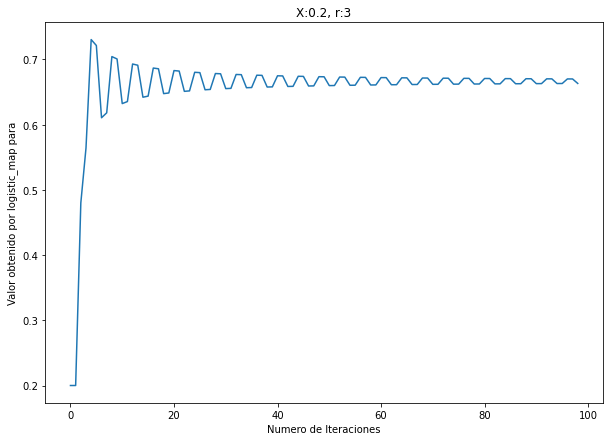

In [45]:
fig, ax = plt.subplots(figsize=(10,7))

plt.plot(lista_de_valores_a_graficar)

plt.ylabel('Valor obtenido por logistic_map')
plt.xlabel('Numero de Iteraciones')
plt.title("X:" + str(x0_incial) +", r:" +str(valor_de_mu))

plt.show()

<div class="alert alert-info">
    
**Ejercicio** ¿Qué sucede para (a) $x_0 = 0.35$ en $r = 2.8$ y (b) para $x_0 = 0.35$ en $r=3.1$. ¿Porqué escogí estos valores?
</div>

<div class="alert alert-block alert-success">
<b>Que sucede:</b> Para 2.8 los valores de la convergen alrededor de 0.65, mientras que para 3.1 los valores fluctuan de manera alternante entre 0.56 y 0.77; dicha fluctuacion no parece atenuarse ni desbordarse, sino pareciera que se vuelve mas precisa entre mas iteraciones existan, como si fueran estables.      
</div>

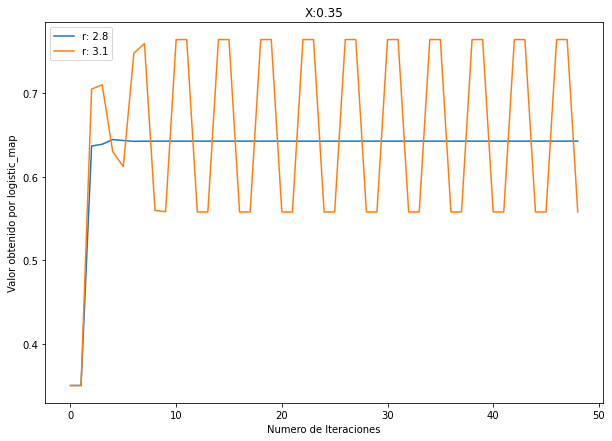

In [61]:
valores_curiosos = []
valores_curiosos.append(iterarLista_logistica(x0=0.35, mu=2.8, N=50))
valores_curiosos.append(iterarLista_logistica(x0=0.35, mu=3.1, N=50))

fig, ax = plt.subplots(figsize=(10,7))
plt.ylabel('Valor obtenido por logistic_map')
plt.xlabel('Numero de Iteraciones')
plt.title("X:" + str(0.35))
plt.plot(valores_curiosos[0], label='r: 2.8')
plt.plot(valores_curiosos[1], label='r: 3.1')
plt.legend()
plt.show()

In [124]:
print(valores_logistic_map[0])

[0.35, 0.35, 0.02275, 0.00022183009372280858, 2.2177547461043357e-07, 2.217754199666108e-11, 2.2177541996114598e-16, 2.21775419961146e-22, 2.217754199611461e-29, 2.2177541996114618e-37, 2.2177541996114627e-46, 2.2177541996114636e-56, 2.2177541996114647e-67, 2.2177541996114656e-79, 2.217754199611467e-92, 2.2177541996114684e-106, 2.21775419961147e-121, 2.2177541996114723e-137, 2.217754199611474e-154, 2.217754199611476e-172, 2.2177541996114787e-191, 2.2177541996114803e-211, 2.2177541996114832e-232, 2.2177541996114857e-254, 2.217754199611488e-277, 2.2177541996114913e-301, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


## Diagrama de CobWeb

<div class="alert alert-info">
    
**Ejercicio** Dibuja en una gráfica `logistic_map`, como ejes usa $N_{n+1}$ y $N_n$, además agrega la línea $y = x$ en la misma gráfica. ¿Qué observas para los distintos valores de $r$? Grafícala junto a la gráfica anterior.
</div>

<div class="alert alert-block alert-success">
<b>¿Qué observas para los distintos valores de $r$?</b> Entre mas aumenta r, mas caotica y menos recta se vuelve, hasta llegar el punto donde se desborda y se vuelve completamente negativo
</div>

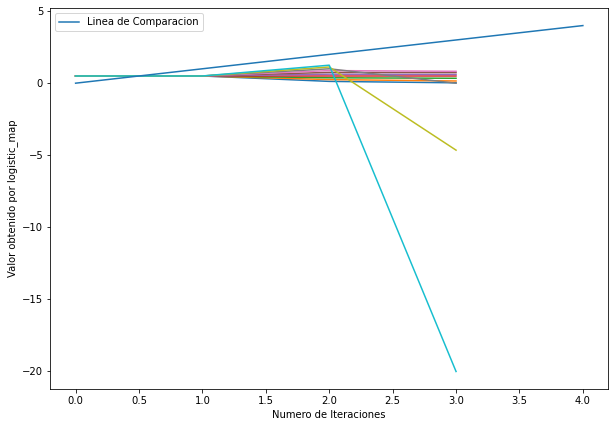

In [168]:
numero_de_iteraciones = 5
linea_de_comparacion = [i for i in range(numero_de_iteraciones)]
valor_de_r = 0.5

valores_logistic_map = []
for i in range(0, 10): #un muestreo de 10 valores distintos de r
    valores_logistic_map.append( iterarLista_logistica(x0=0.5, mu=valor_de_r, N=numero_de_iteraciones) )
    valor_de_r += 0.5

fig, ax = plt.subplots(figsize=(10,7))
plt.ylabel('Valor obtenido por logistic_map')
plt.xlabel('Numero de Iteraciones')
for i in range(0, 10):
    plt.plot(valores_logistic_map[i])
    

plt.plot(linea_de_comparacion, label = 'Linea de Comparacion')
plt.legend()
plt.show()

<div class="alert alert-info">
    
**Ejercicio** Agrega los segmentos de línea $(x_0, x_0), (x_0. f(x_0)), (f(x_0), f(x_0)), (f(x_0), f(f(x_0))), \ldots$
</div>

In [84]:
mi_x0 = 0.4
valores_iterados = []
numero_de_iteraciones = 10

for i in range(numero_de_iteraciones):
    tupla = (mi_x0, logistic_map(x=mi_x0, r=3.5))
    valores_iterados.append(tupla)
    mi_x0 = logistic_map(x=mi_x0, r=2.8)
print(valores_iterados)

[(0.4, 0.8400000000000001), (0.6719999999999999, 0.7714560000000001), (0.6171648000000001, 0.82695343374336), (0.6615627469946879, 0.7836411757423566), (0.6269129405938854, 0.8186258692843452), (0.6549006954274762, 0.7910202109462949), (0.6328161687570358, 0.813259528608459), (0.6506076228867672, 0.7956107037493906), (0.6364885629995125, 0.8097980525961483), (0.6478384420769187, 0.7985032826549435)]


## Diagrama de Bifurcación

<div class="alert alert-info">
    
**Ejercicio** ¿Qué hace el siguiente código? Modificalo para que use nuestras funciones.
</div>

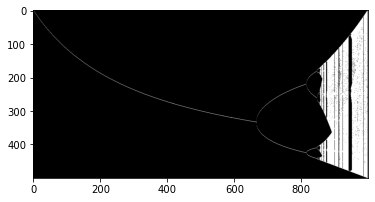

In [86]:
import math
from PIL import Image
imgx = 1000
imgy = 500
image = Image.new("RGB", (imgx, imgy))

xa = 1
xb = 4
maxit = 5000

for i in range(imgx):
    r = xa + (xb - xa) * float(i) / (imgx - 1)
    x = 0.5
    for j in range(maxit):
        x = r * x * (1 - x)
        if j > maxit / 2:
            image.putpixel((i, int(x * imgy)), (255, 255, 255))

image.save("bifurcacion.png", "PNG")

import matplotlib.image as img
im = img.imread('bifurcacion.png')
plt.imshow(im)

### Pasos para producir el diagrama de bifurcación

1. Escoje un valor inicial para `r`
2. Escoje un valor al azar para `x` en `[0,1]`
3. Calcula la órbita de `x` bajo el `g` (en el caso anterior el mapeo logístico)
4. Ignora las primeras `n` iteraciones y dibuja el valor de `x` para la iteración `n+1`
5. Incrementa `r` y repite hasta `r` final.

<div class="alert alert-info">
**Ejercicio** Repite todo lo anterior para el mapeo

$$
f(x,\mu) = 1 - \mu x^2
$$

¿Qué diferencia observas? ¿Cuáles son sus puntos fijos? ¿Cuáles son los valores interesantes?
</div>

In [108]:
import random
def mi_mapeo(x, miu):
    return 1 - (miu * (x**2))

def iterar_lista_orbital(x0, r, N):
    lista_de_iteraciones = []
    for i in range(N+1):
        lista_de_iteraciones.append(x0)
        x0 = mi_mapeo(x = x0, miu = r)
    
    return lista_de_iteraciones

valor_de_r_inicial = 2
valor_aleatorio_de_x = random.uniform(0, 1)
numero_de_iteraciones_orbitales = 10
##nomas aguanta hasta 6 iteraciones porque los resultados son muy grandes

orbita = iterar_lista_orbital(x0=valor_aleatorio_de_x, r=valor_de_r_inicial, N=numero_de_iteraciones_orbitales)

In [177]:
orbita

[0.2873730560162222,
 0.8348334533517945,
 -0.39389378967056565,
 0.6896953649179204,
 0.04864060722147323,
 0.9952681826582528,
 -0.9811175108237224,
 -0.9251831400898742,
 -0.7119276854131198,
 -0.013682058515364082,
 0.9996256025495643]

# Triangulo de Serpinski

In [176]:
import turtle
def serpinski(largo_del_triangulo, iteraciones):
    if iteraciones==0:
        for i in range(0,3):
            t.fd(largo_del_triangulo)
            t.left(120)
    else:
        serpinski(largo_del_triangulo/2,iteraciones-1)
        t.fd(largo_del_triangulo/2)
        serpinski(largo_del_triangulo/2,iteraciones-1)
        t.bk(largo_del_triangulo/2)
        t.left(60)
        t.fd(largo_del_triangulo/2)
        t.right(60)
        serpinski(largo_del_triangulo/2,iteraciones-1)
        t.left(60)
        t.bk(largo_del_triangulo/2)
        t.right(60)        
       

window = turtle.Screen()
t = turtle.Turtle()
t.speed(10) 
serpinski(500,2)
